## Simple XOR example using Keras

**Description**: The 'Hello World' of practical Keras examples.

**Created**: 4/2018

### Imports

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras as k

### Prepare Data

In [68]:
# XOR dataset
training_data = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
training_targets = np.array([[0], [1], [1], [0]])

### Build Network

In [69]:
# network shape
n_input = training_data.shape[1]
n_hidden = 5
n_classes = 1

# hyperparameters
training_epochs = 100
learning_rate = 0.1
display_step = 10

# model filename for save/load
model_filename = './k_model.h5'

In [70]:
# sequential
model = k.models.Sequential()

# create network
model.add(k.layers.Dense(n_hidden, input_dim=n_input, activation='sigmoid'))
model.add(k.layers.Dense(n_classes, activation='sigmoid'))

# optimizer
optimizer = k.optimizers.Adam(lr=learning_rate)

# compile it
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Train Network

In [ ]:
# Train the model
training_history = model.fit(training_data, training_targets, epochs=training_epochs, batch_size=4, verbose=0)

# Save the model
model.save(model_filename)

### Plot

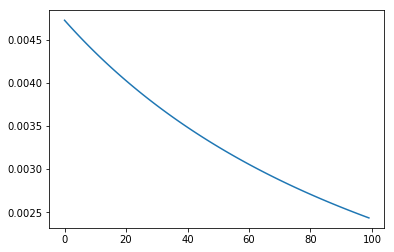

In [65]:
# To see saved history keys: print(training_history.history.keys())
plt.plot(training_history.history['loss'])

### Test

In [66]:
# Load the model
model = k.models.load_model(model_filename)

# Test
prediction = model.predict(training_data)

# Accuracy
accuracy = 1 - np.mean(abs(training_targets - prediction))
print('Accuracy: {:.4f}%'.format(accuracy * 100))

Accuracy: 99.7581%


### Observations

Almost too easy with Keras. Had to set the learning rate explicitly by creating the optimizer, then passing as parameter to model.compile(). 